X Shape : (26, 2)


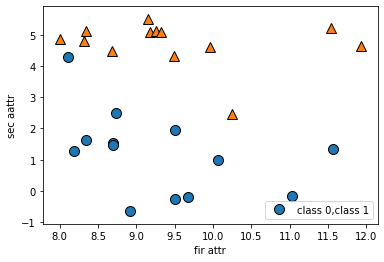

In [6]:
#인위적 이진분류 데이터
import mglearn
import matplotlib.pyplot as plt
X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['class 0,class 1'],loc='best')
plt.xlabel("fir attr")
plt.ylabel("sec aattr")
print(f"X Shape : {X.shape}")

(40, 1)


(-3.0, 3.0)

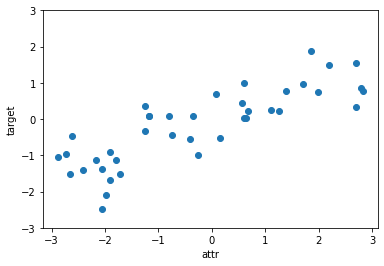

In [8]:
#인위적 회귀 데이터
X,y=mglearn.datasets.make_wave(n_samples=40)
print(X.shape)
plt.plot(X,y,'o')
plt.xlabel('attr')
plt.ylabel('target')
plt.ylim(-3,3)

In [2]:
#분류 실제 데이터 :위스콘신 암
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print(f"cancer.keys(): {cancer.keys()}")
print(cancer.data.shape)
print(cancer.target_names)

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
['malignant' 'benign']


In [8]:
import numpy as np
print(np.bincount(cancer.target))
print("클래스별 데이터 개수 : ",{n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}) #bincount()->양의정수1차원배열 빈도수

[212 357]
클래스별 데이터 개수 :  {'malignant': 212, 'benign': 357}


In [29]:
#회귀 실제 데이터 :보스턴 주택가격
from sklearn.datasets import load_boston
boston=load_boston()
print('데이터형태:',boston.data.shape)

데이터형태: (506, 13)


In [31]:
X,y=mglearn.datasets.load_extended_boston()
print('X.shape:',X.shape) #특성의 가짓수가 늘어남

X.shape: (506, 104)


C:\Users\sewoong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


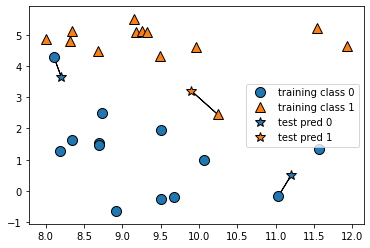

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1) #forge dataset

In [22]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
print("X_test 예측 결과: ",prediction)
print("X_test 실제 결과: ",y_test)
print("X_test 예측 정확도: {:.02f}%".format(knn.score(X_test,y_test)*100))

X_test 예측 결과:  [1 0 1 0 1 0 0]
X_test 실제 결과:  [1 0 1 0 1 1 0]
X_test 예측 정확도: 85.71%


C:\Users\sewoong\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


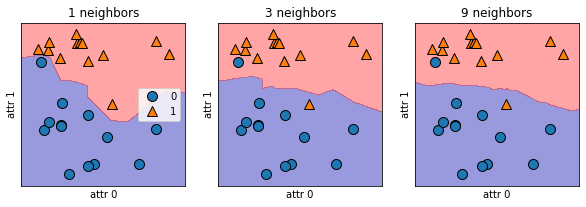

In [26]:
fig,axes=plt.subplots(1,3,figsize=(10,3))
for neighbor,axe in zip([1,3,9],axes): #(1, first subplot),(3,second subplot),(9,third subplot) return
    knn=KNeighborsClassifier(n_neighbors=neighbor).fit(X,y)
    mglearn.plots.plot_2d_separator(knn,X,fill=True,eps=0.5,ax=axe,alpha=.4) #경계 그리기
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=axe)
    axe.set_title(f"{neighbor} neighbors")
    axe.set_xlabel("attr 0")
    axe.set_ylabel("attr 1")
axes[0].legend(loc='best')
#neighbor inverse to complexity of model

Text(0, 0.5, 'accuracy')

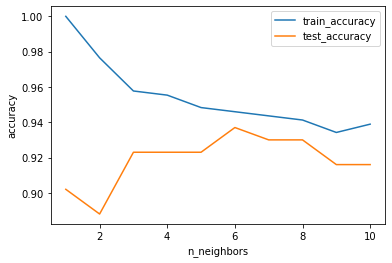

In [38]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
test_accuracy=[]
train_accuracy=[]
neighbors=range(1,11)
for neighbor in neighbors:
    cnn=KNeighborsClassifier(n_neighbors=neighbor).fit(X_train,y_train)
    test_accuracy.append(cnn.score(X_test,y_test))
    train_accuracy.append(cnn.score(X_train,y_train))
plt.plot(neighbors,train_accuracy,label='train_accuracy')
plt.plot(neighbors,test_accuracy,label='test_accuracy')
plt.legend(loc='best')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
#모델 복잡도-정확도 그래프와 유사.(이웃수와 모델복잡도는 반비례 관계)

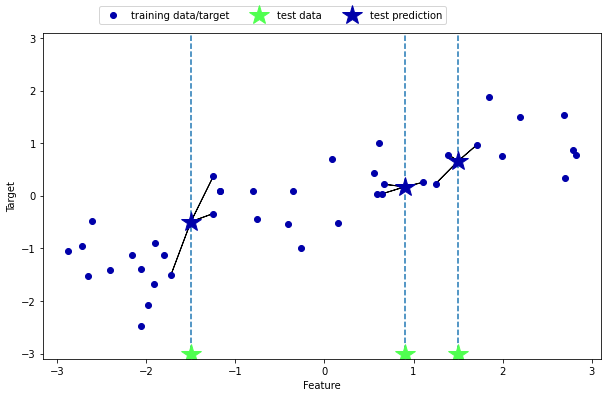

In [40]:
mglearn.plots.plot_knn_regression(n_neighbors=3) #wave dataset

In [52]:
from sklearn.neighbors import KNeighborsRegressor
X,y=mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
reg=KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
print("X_test 예측 결과 :",reg.predict(X_test))
print("X_test 실제 결과 :",y_test)
print("X_test 예측 정확도 :{:.2f}%".format(reg.score(X_test,y_test)*100))

[2.81945911]
X_test 예측 결과 : [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
X_test 실제 결과 : [ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
X_test 예측 정확도 :83.44%


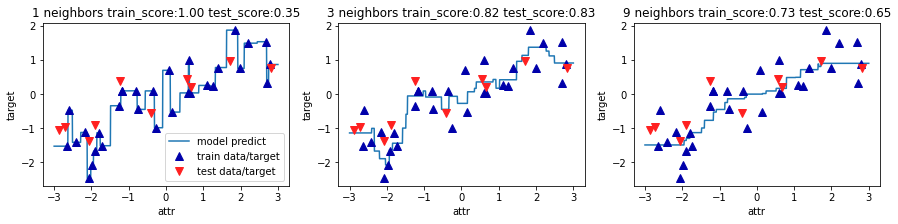

In [56]:
import numpy as np
fig,axes=plt.subplots(1,3,figsize=(15,3))
lines=np.linspace(-3,3,1000).reshape(-1,1) #X의 범주가 대략 -3~+3 이기때문
for neighbor,axe in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=neighbor).fit(X_train,y_train)
    axe.plot(lines,reg.predict(lines))
    axe.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    axe.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    axe.set_title("{} neighbors train_score:{:.2f} test_score:{:.2f}".format(neighbor,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    axe.set_xlabel('attr')
    axe.set_ylabel('target')
axes[0].legend(['model predict','train data/target','test data/target'],loc='best')